In [1]:
from ThinFilmClasses import ThinFilmLayer, ThinFilmSystem
from DataProcessing import process_data, data_smoothing, plot_reflectance
from Optimization import residuals, optimize_nk
import numpy as np

In [8]:
# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
# path = r'C:\Users\hongr\Box\MURI-SARA\Code\Sample_Refl_Scan\1.csv'
path = r'test_data\spectra\+02_+05.csv'
left = 400
right = 800
data = process_data(path, left, right)

# 2. Create multilayer system
n_points = 5 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("igzo_111", 108, n_points, left, right)
layer2 = ThinFilmLayer("sio2", 88, 0, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer = ThinFilmSystem([air, layer1, layer2, substrate])
R, _, _ = multilayer.calculate_RTA(data['wavelength'])
print(R)

# 3. Optimization (The most time-consuming step!)
optimal_data, _ = optimize_nk(multilayer, layer_index=1, data=data, n_points=n_points, smooth=True)

nk data found for air.
nk data found for igzo_111.
nk data found for sio2.
nk data found for c-Si.
[0.57218951 0.56938665 0.56658178 ... 0.50393449 0.50372351 0.50351252]
Initial n of layer1 is: [2.1479062  2.12059613 2.10020029 2.08189884 2.06634092 2.05286034
 2.03987851 2.03052791 2.02010444 2.01090206]
Initial k of layer1 is: [3.948970e-03 2.308911e-03 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 9.780000e-05 8.092060e-04 1.083254e-03 3.841300e-04]


ValueError: Inconsistent shapes between bounds and `x0`.

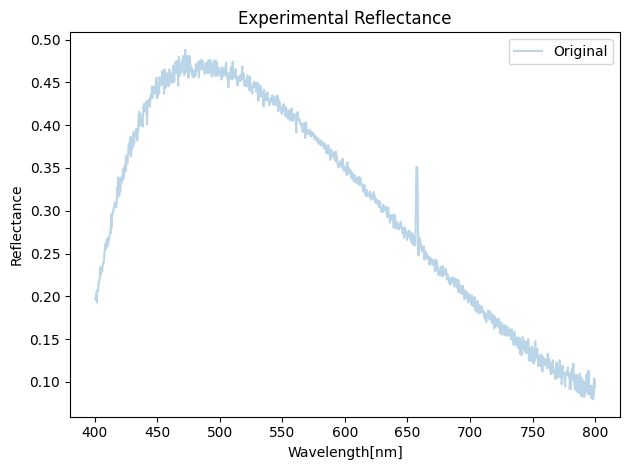

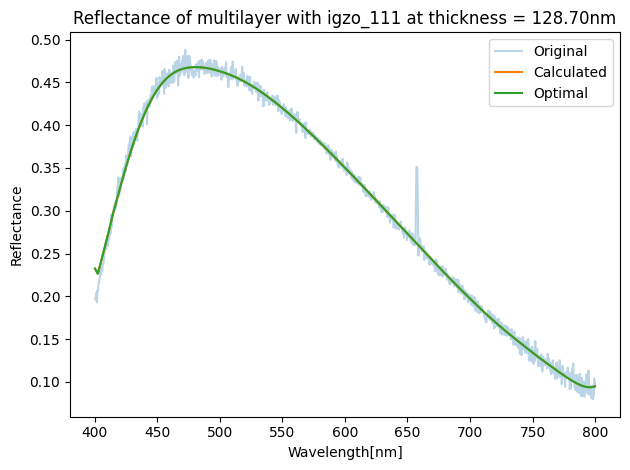

In [7]:
# 4. Plot the reflectance
plot_reflectance(data)
plot_reflectance(data, smooth=False, multilayer=multilayer, layer_index=1, optimal_data=optimal_data)